<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Anna/test_anna05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
points = np.random.rand(100, 2) * 10 -3

In [23]:
points

array([[ 2.07369898, -0.88922945],
       [ 2.33621919,  1.43169332],
       [-1.82856582, -1.31331708],
       [ 6.18350152,  2.20721438],
       [ 2.26830156,  3.07893242],
       [ 6.59466096,  1.16623017],
       [-1.14675336,  6.66587737],
       [ 0.37268238, -0.11943051],
       [-1.83798184, -1.32850337],
       [ 6.49316908,  3.92959484],
       [ 4.44979628,  4.4642212 ],
       [-1.40426654,  4.23618968],
       [ 1.45199557,  0.57243955],
       [-2.34987731, -2.42658556],
       [ 6.90391822,  1.63621868],
       [-0.52408411, -1.48997387],
       [ 4.46445161,  4.94150573],
       [-1.10611039,  5.76711515],
       [ 5.54611599,  2.6235268 ],
       [ 6.36904087, -2.62049974],
       [ 1.63277854,  6.97379599],
       [-1.73353061,  3.06444402],
       [-2.18630217, -2.53336293],
       [ 1.18179511,  4.32283462],
       [ 3.49236616, -1.08570429],
       [ 2.93749284,  5.18114828],
       [-0.57611237,  4.92395435],
       [-0.42076729, -0.82670236],
       [ 2.30314483,

In [24]:
# Helper function to compute the distance of a point from a line segment
def compute_distance(start, end, point):
    '''Compute the signed area of the parallelogram spanned by vectors (end-start) and (point-start)'''
    return np.cross(end - start, point - start)

# Function to divide points into subsets relative to a line segment
def divide_area(start, end, points):
    '''Divide points based on their position relative to the line from start to end'''
    S1, S2 = [], []
    for point in points:
        dis = compute_distance(start, end, point)
        if dis > 0:
            S1.append(point)
        else:
            S2.append(point)
    return np.array(S1), np.array(S2)

# Main QuickHull algorithm implementation
class QuickHull:
    def __init__(self, points):
        self.points = np.array(points)
        self.hull = []

    def execute(self):
        # Base case: if there are fewer than 3 unique points, cannot form a convex hull
        if len(self.points) < 3:
            return None

        # Find leftmost and rightmost points
        left_most = min(self.points, key=lambda point: point[0])
        right_most = max(self.points, key=lambda point: point[0])

        # Initialize convex hull with leftmost and rightmost points
        self.hull.append(left_most)
        self.hull.append(right_most)

        # Divide remaining points into two groups relative to the line segment
        S1, S2 = divide_area(left_most, right_most, self.points)

        # Recursive steps to find points on the hull
        self.find_hull(S1, left_most, right_most)
        self.find_hull(S2, right_most, left_most)

        return np.array(self.hull)

    def find_hull(self, points, P, Q):
        if len(points) == 0:
            return

        # Find the farthest point from the line PQ
        C = max(points, key=lambda point: np.abs(compute_distance(P, Q, point)))
        self.hull.append(C)

        # Remove C from points to avoid reconsidering it
        points = np.array([point for point in points if not np.array_equal(point, C)])

        # Divide points into two subsets relative to PC and CQ
        S1, _ = divide_area(P, C, points)
        S2, _ = divide_area(C, Q, points)

        # Recursively find points on the hull in subsets S1 and S2
        self.find_hull(S1, P, C)
        self.find_hull(S2, C, Q)

qh = QuickHull(points)
convex_hull = qh.execute()
print("Convex Hull Points:\n", convex_hull)

Convex Hull Points:
 [[-2.91674955  5.90553801]
 [ 6.90391822  1.63621868]
 [ 5.96852832  5.78846254]
 [ 1.63277854  6.97379599]
 [-1.14675336  6.66587737]
 [ 3.79802836  6.41295128]
 [ 6.86724272  4.47956298]
 [-2.18630217 -2.53336293]
 [ 6.36904087 -2.62049974]
 [ 6.83446695 -1.75741476]
 [ 6.89573959 -0.46060234]
 [ 0.48466291 -2.64127815]
 [-2.7949816   0.89189749]
 [-2.34987731 -2.42658556]]


In [25]:
def sort_points_convex_hull(hull):
    hull_sorted = sorted(hull, key=lambda point: point[0])
    return np.array(hull_sorted)

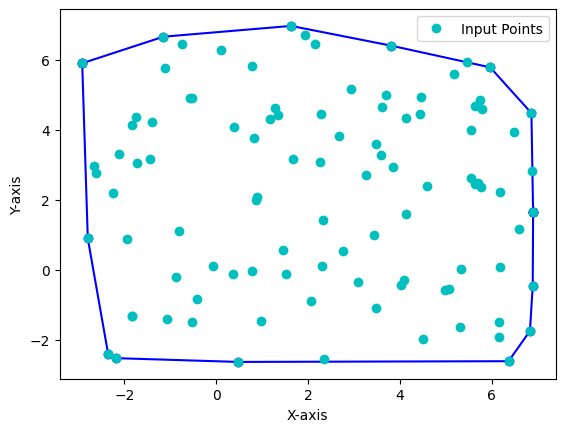

In [26]:
def plot_upper_lower_sides(hull):
    hull_sorted = sort_points_convex_hull(hull)

    # Splitting hull points into upper and lower sides
    upper = [hull_sorted[0]]
    lower = [hull_sorted[0]]
    for point in hull_sorted[1:]:
        if compute_distance(hull_sorted[0], hull_sorted[-1], point) > 0:
            upper.append(point)
        else:
            lower.append(point)
    upper.append(hull_sorted[-1])
    lower.append(hull_sorted[-1])

    upper = np.array(upper)
    lower = np.array(lower)


    plt.plot(upper[:, 0], upper[:, 1], 'bo-')
    plt.plot(lower[:, 0], lower[:, 1], 'bo-')
    plt.plot(points[:, 0], points[:, 1], 'co', label='Input Points')


    plt.legend()
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

plot_upper_lower_sides(convex_hull)